# 実施内容

①実施内容\
　猫の顔画像をDCGANおよびLSGANで生成し、その精度を検証する。\
　64x64データでの実施はインターネットでもよく見かけるので、128x128のデータ生成を試みる。\
　参考HP：https://ajolicoeur.wordpress.com/cats/

②追加実施内容\
　最適化アルゴリズムおよび活性化関数をそれぞれ、RAdam, Mishに変更した場合の、DCGANおよびLSGANにおける影響を検証する（注）。
 
  　RAdam :https://qiita.com/omiita/items/d24568a835da6911b01e　
  
 　　　　  (原論文)      https://arxiv.org/abs/1908.03265 
       
  　　　　 (論文筆者の公開しているRAdamコード)      https://github.com/LiyuanLucasLiu/RAdam 
       
  Mish  :https://atmarkit.itmedia.co.jp/ait/articles/2004/28/news017.html
  
  
  注：ざっと調べたが、どちらともGANの分野での有効性を調べているような資料はあまり見つからなかった。\
  　　はじめはMishと同様にReluの代替関数として考案されたTanhexp関数を実装して使おうと考えましたが\
　　なぜかいつも学習途中でCUDAのエラーが出て止まるので、Pytorchで公式実装済みのMish関数を使うことにしました…。


# 使用データ

A．これまでに撮りためた我が家の猫の写真から顔写真をピックアップ。約800枚ほど。\
　　このデータで十分な学習を行うためには量が不足していると考えらえるため、以下のBのデータを追加してデータ量を増加させる。

B．KAGGLE（https://www.kaggle.com/spandan2/cats-faces-64x64-for-generative-models）
の猫画像サンプル。\
　 64x64のデータなので、128x128に拡大して使用する。\
　データサンプルは最大で30,000枚だが、生成結果へのAの影響をできるだけ大きくするためにそのうちから9,000枚程度を使用する(※)。\
※参考HPの結果から、学習データは合計9,000枚程度あれば充分に学習できると推定した。

# 結果
実施内容①の結果。DCGANで学習がおよそ収束したエポック数400回までの結果を比較した。\
なお学習率などのハイパーパラメータは参考HPでの値を参照し、結果を見ながら必要に応じて調整した。

DCGAN\
使用ファイル：DCGAN_Relu.ipynb

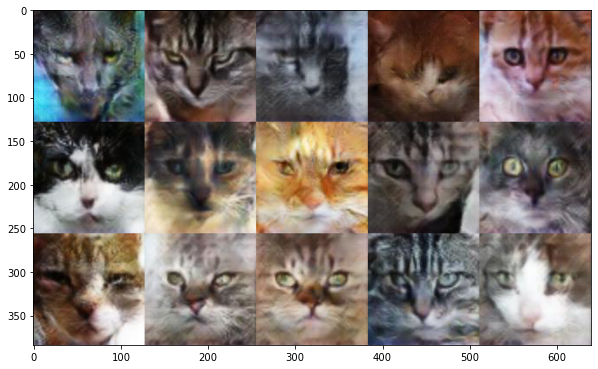

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


im = Image.open("DCGAN_Relu128.jpg")
im_list = np.asarray(im)
plt.figure(figsize=(10,10))
plt.imshow(im_list)
plt.show()

LSGAN\
使用ファイル：LSGAN.ipynb

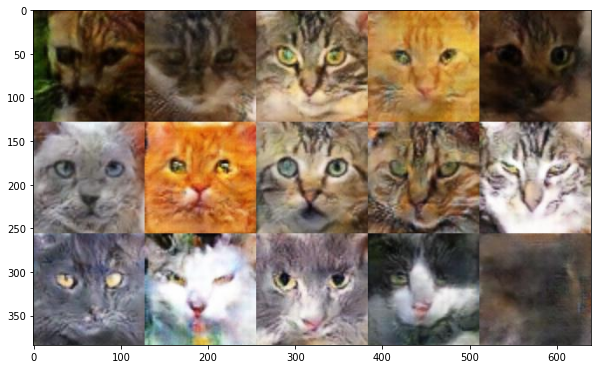

In [8]:
im = Image.open("LSGAN128.jpg")
im_list = np.asarray(im)
plt.figure(figsize=(10,10))
plt.imshow(im_list)
plt.show()

学習の収束性の比較

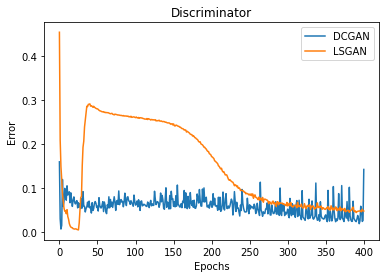

In [4]:
DC1 = np.loadtxt('ErrorReal-DCGAN_Relu.csv', delimiter=',')
LS1 = np.loadtxt('ErrorReal-LSGAN.csv', delimiter=',')

plt.plot(range(len(LS1)), DC1[:401], label="DCGAN")
plt.plot(range(len(LS1)), LS1, label="LSGAN")
plt.legend()

plt.title('Discriminator')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


# まとめおよび考察

・学習の安定性は明らかにLSGANのほうがよい。\
・識別機側の検出精度と生成画像の質はそこまで対応していない印象がある。\
識別器の精度は（安定はしていないが）DCGANのほうが高くなってはいる。しかし生成された画像を見ると（あくまで感覚的/好みだが）\
LSGANのほうが"猫らしい"ように見える。

・KAGGLEからのデータは64x64からの拡大であるため全体的にボケている、\
対して自画像からのデータは画質はよいが、KAGGLEデータのようにいつも猫が正面を向いている画像ばかりではない、\
これらの影響で、生成画像の質が劣化しているように感じる。\
(自画像を加えることで、我が家の猫によく似た猫の画像が増えることを期待したが、上記の問題のために単に品質を劣化させただけに終わったように思える。)

・生成画像の向上に最も大きな影響を与えるのは、学習データの量・質を向上させることであるように感じた。

# 追加実施内容の結果

・最適化アルゴリズムをAdamからRAdamに変更する。\
・加えて、生成器側の活性化関数をReluからMishに変更する。\
なお、上記の変更に際し、変更前の学習率では学習が発散してしまう状況が頻発したため、学習率を半分の値にした。


DCGAN\
使用ファイル：DCGAN-RAdam_Mish.ipynb

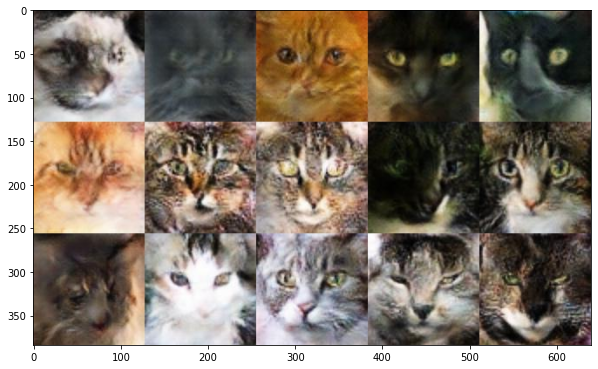

In [21]:
im = Image.open("DCGAN-RAdamAndMish128.jpg")
im_list = np.asarray(im)
plt.figure(figsize=(10,10))
plt.imshow(im_list)
plt.show()

LSGAN\
使用ファイル：LSGAN-RAdam_Mish.ipynb \
※学習があまり進まなかったため、クオリティがとても低くなってしまった。

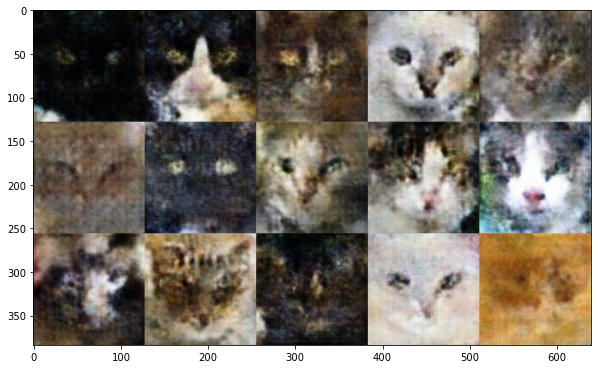

In [3]:
im = Image.open("LSGAN-RAdamAndMish128.jpg")
im_list = np.asarray(im)
plt.figure(figsize=(10,10))
plt.imshow(im_list)
plt.show()

学習の収束性の比較-DCGANとLSGAN

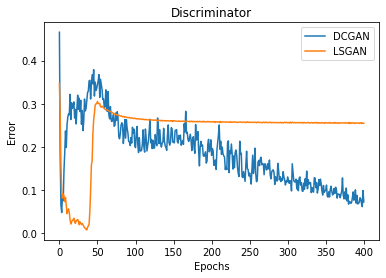

In [8]:
DC2 = np.loadtxt('ErrorReal-DCGAN-RAdamAndMish.csv', delimiter=',')
LS2 = np.loadtxt('ErrorReal-LSGAN-RAdamAndMish.csv', delimiter=',')

plt.plot(range(len(LS1)), DC2[:401], label="DCGAN")
plt.plot(range(len(LS1)), LS2, label="LSGAN")
plt.legend()

plt.title('Discriminator')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


学習の収束性の比較-最適化アルゴリズムと活性化関数(DCGANの場合)

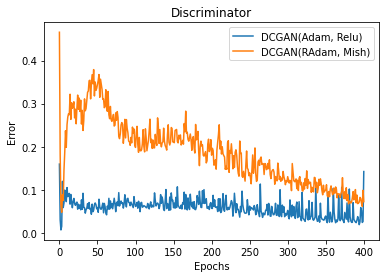

In [9]:
plt.plot(range(len(LS1)), DC1[:401], label="DCGAN(Adam, Relu)")
plt.plot(range(len(LS1)), DC2, label="DCGAN(RAdam, Mish)")
plt.legend()

plt.title('Discriminator')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

学習の収束性の比較-最適化アルゴリズムと活性化関数(LSGANの場合)

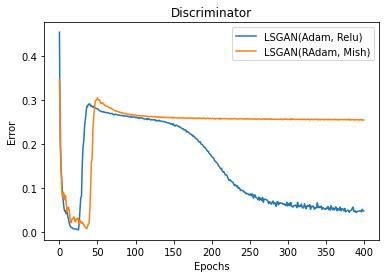

In [10]:
plt.plot(range(len(LS1)), LS1[:401], label="LSGAN(Adam, Relu)")
plt.plot(range(len(LS1)), LS2, label="LSGAN(RAdam, Mish)")
plt.legend()

plt.title('Discriminator')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# まとめおよび考察（追加実施分）

・上記の通りアルゴリズムの変更に際して学習率を半減させているため、特にDCGANで学習速度は落ちている。\
・しかしそれを差し引いても、アルゴリズムや活性化関数を変更したことによる学習精度や安定性への明らかな改善効果は今回は見られなかった。\
・特にLSGANでは精度が向上しないままに収束してしまった。\
・学習の収束性については学習率などのハイパーパラメータの影響が非常に大きいことがわかった。\
・ハイパーパラメータの値を改善することで、少なくとも学習速度については改善できる可能性があると考えられる。

# 所感／今後の課題

・冒頭にも書きましたが、はじめはMishと同様にReluの代替関数として考案されたTanhexp関数を実装して使おうと考えましたが、なぜかいつも学習途中でCUDAのエラーが出て止まるので、Pytorchで公式実装済みのMish関数を使うことにしました。できればこの原因を解決して、自作のTanhexp活性化関数で再トライしてみたいと考えています。（ただし今回の結果から、あまり効果は期待できないのでは？と推察…）

・ハイパーパラメータである学習率は学習速度や収束性に非常に大きな影響を与えることを実感。学習率を改善することでさらによい結果が得られるのでは？とも思うが最適なハイパーパラメータを決定することはなかなか難しい…（試行錯誤を繰り返すしかない？）

